In [4]:
!pip install filterpy

In [5]:
import pandas as pd

try:
    df_aged = pd.read_csv('Experimental_data_aged_cell.csv')
    df_fresh = pd.read_csv('Experimental_data_fresh_cell.csv')
    df_ocv = pd.read_csv('OCV_vs_SOC_curve.csv')
    display(df_aged.head())
    display(df_fresh.head())
    display(df_ocv.head())
except FileNotFoundError:
    print("One or more CSV files not found.")
except pd.errors.EmptyDataError:
    print("One or more CSV files are empty.")
except pd.errors.ParserError:
    print("Error parsing one or more CSV files.")

,Time,Current,Voltage,Temperature
0,0.000000,2.360728,2.999311,27.449894
1,1.000008,2.303036,2.999813,27.724861
2,2.000008,2.284371,2.999863,27.545357
3,3.000008,2.221588,2.999863,27.457523
4,4.000008,2.158805,2.999813,27.484249


,Time,Current,Voltage,Temperature
0,0.000000,2.158704,2.999607,26.384377
1,1.000000,2.287674,2.999407,26.227879
2,2.000000,2.228280,2.999757,26.449251
3,2.999992,2.224886,2.999857,26.277494
4,4.000000,2.134946,2.999958,26.380539


,SOC,V0
0,0.000,3.010470
1,0.001,3.031911
2,0.002,3.049571
3,0.003,3.065900
4,0.004,3.080937


Data Shapes and Data Types:
df_aged shape: (307513, 4)
df_aged data types:
 Time           float64
Current        float64
Voltage        float64
Temperature    float64
dtype: object

df_fresh shape: (358309, 4)
df_fresh data types:
 Time           float64
Current        float64
Voltage        float64
Temperature    float64
dtype: object

df_ocv shape: (1001, 2)
df_ocv data types:
 SOC    float64
V0     float64
dtype: object

Missing Values:
df_aged missing values:
 Time           0.0
Current        0.0
Voltage        0.0
Temperature    0.0
dtype: float64

df_fresh missing values:
 Time           0.0
Current        0.0
Voltage        0.0
Temperature    0.0
dtype: float64

df_ocv missing values:
 SOC    0.0
V0     0.0
dtype: float64

Descriptive Statistics:
df_aged:
                 Time        Current        Voltage    Temperature
count  307513.000000  307513.000000  307513.000000  307513.000000
mean   153756.000008      -0.163968       3.849060      26.320183
std     88771.501002      

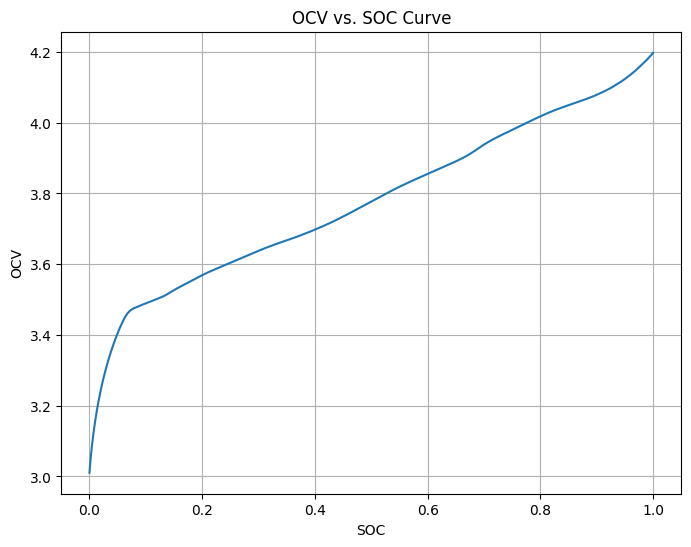

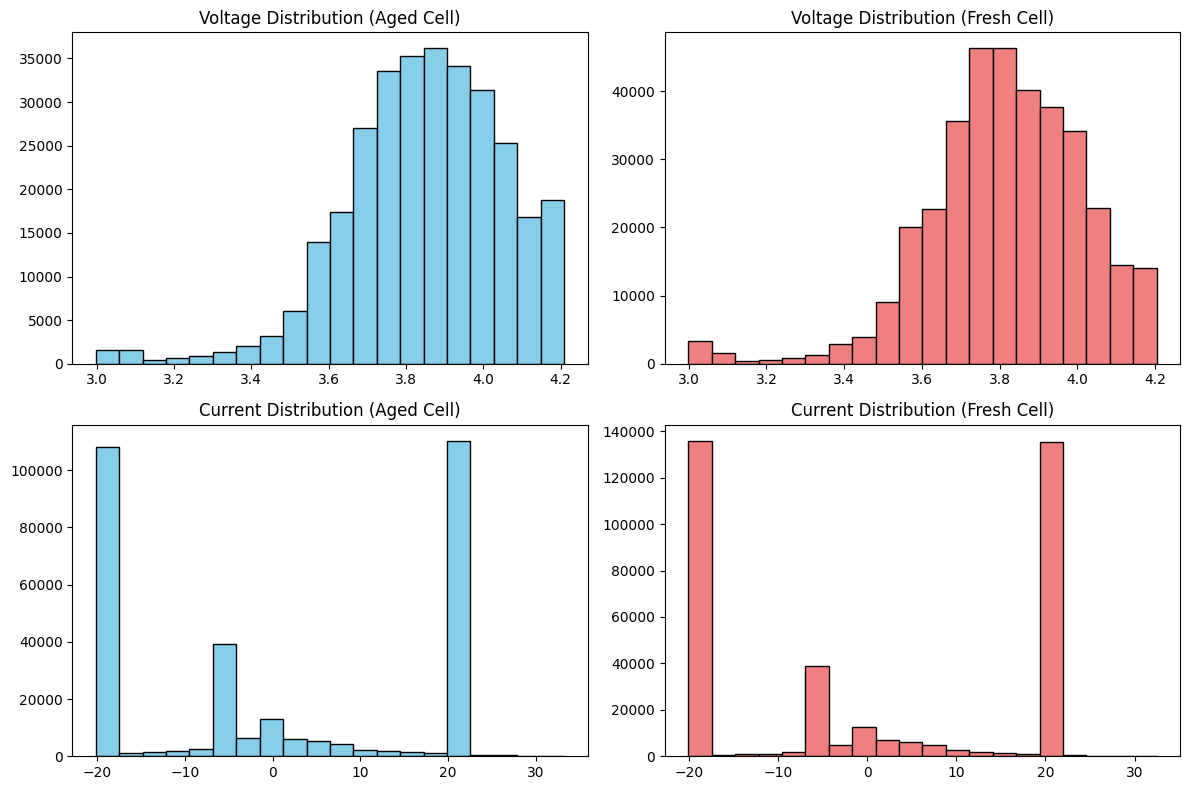

In [6]:
import matplotlib.pyplot as plt

# 1. Examine Data Shapes and Data Types
print("Data Shapes and Data Types:")
print("df_aged shape:", df_aged.shape)
print("df_aged data types:\n", df_aged.dtypes)
print("\ndf_fresh shape:", df_fresh.shape)
print("df_fresh data types:\n", df_fresh.dtypes)
print("\ndf_ocv shape:", df_ocv.shape)
print("df_ocv data types:\n", df_ocv.dtypes)

# 2. Identify Missing Values
print("\nMissing Values:")
print("df_aged missing values:\n", df_aged.isnull().sum() / len(df_aged) * 100)
print("\ndf_fresh missing values:\n", df_fresh.isnull().sum() / len(df_fresh) * 100)
print("\ndf_ocv missing values:\n", df_ocv.isnull().sum() / len(df_ocv) * 100)

# 3. Statistical Summary
print("\nDescriptive Statistics:")
print("df_aged:\n", df_aged.describe())
print("\ndf_fresh:\n", df_fresh.describe())
print("\ndf_ocv:\n", df_ocv.describe())

# 4. Analyze the OCV vs. SOC Curve
plt.figure(figsize=(8, 6))
plt.plot(df_ocv['SOC'], df_ocv['V0'])
plt.xlabel('SOC')
plt.ylabel('OCV')
plt.title('OCV vs. SOC Curve')
plt.grid(True)
plt.show()

# 5. Data Distribution Visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df_aged['Voltage'], bins=20, color='skyblue', edgecolor='black')
plt.title('Voltage Distribution (Aged Cell)')

plt.subplot(2, 2, 2)
plt.hist(df_fresh['Voltage'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Voltage Distribution (Fresh Cell)')


plt.subplot(2, 2, 3)
plt.hist(df_aged['Current'], bins=20, color='skyblue', edgecolor='black')
plt.title('Current Distribution (Aged Cell)')

plt.subplot(2, 2, 4)
plt.hist(df_fresh['Current'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Current Distribution (Fresh Cell)')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np

def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

df_aged = handle_outliers_iqr(df_aged, ['Voltage', 'Current', 'Temperature'])
df_fresh = handle_outliers_iqr(df_fresh, ['Voltage', 'Current', 'Temperature'])
df_ocv = handle_outliers_iqr(df_ocv, ['SOC', 'V0'])

df_ocv = df_ocv.sort_values('SOC')
display(df_aged.head())
display(df_fresh.head())
display(df_ocv.head())

,Time,Current,Voltage,Temperature
0,0.000000,2.360728,3.320944,27.449894
1,1.000008,2.303036,3.320944,27.688597
2,2.000008,2.284371,3.320944,27.545357
3,3.000008,2.221588,3.320944,27.457523
4,4.000008,2.158805,3.320944,27.484249


,Time,Current,Voltage,Temperature
0,0.000000,2.158704,3.32572,26.384377
1,1.000000,2.287674,3.32572,26.227879
2,2.000000,2.228280,3.32572,26.449251
3,2.999992,2.224886,3.32572,26.277494
4,4.000000,2.134946,3.32572,26.380539


,SOC,V0
0,0.000,3.040725
1,0.001,3.040725
2,0.002,3.049571
3,0.003,3.065900
4,0.004,3.080937


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Combine Datasets
df_combined = pd.concat([df_aged, df_fresh], keys=['aged', 'fresh'], names=['cell_type'])
df_combined = df_combined.reset_index(level=0)

# 2. Prepare OCV Data
ocv_mapping = df_ocv.set_index('SOC')['V0']

def get_ocv(soc):
    return ocv_mapping.asof(soc)

# 3. Data Splitting
df_train, df_test = train_test_split(
    df_combined, test_size=0.2, stratify=df_combined['cell_type'], random_state=42
)

display(df_combined.head())
display(df_train.head())
display(df_test.head())
print(get_ocv(0.5))

,cell_type,Time,Current,Voltage,Temperature
0,aged,0.000000,2.360728,3.320944,27.449894
1,aged,1.000008,2.303036,3.320944,27.688597
2,aged,2.000008,2.284371,3.320944,27.545357
3,aged,3.000008,2.221588,3.320944,27.457523
4,aged,4.000008,2.158805,3.320944,27.484249


,cell_type,Time,Current,Voltage,Temperature
58209,fresh,58209.000000,20.068525,3.989489,25.827097
221896,aged,221896.000008,-20.017035,4.057655,26.919031
243046,aged,243046.000008,8.552452,3.554148,26.003695
166282,aged,166282.000008,20.031492,3.727928,26.185774
153671,aged,153671.000008,19.997555,3.885951,26.487469


,cell_type,Time,Current,Voltage,Temperature
141912,fresh,141912.000000,20.075313,3.519393,25.926327
235485,aged,235485.000008,6.025875,3.977463,25.714945
43003,aged,43003.000008,19.880475,4.010544,25.910782
60952,aged,60952.000008,-19.991582,4.056503,26.934313
268817,fresh,268817.000000,19.990465,3.614514,25.601887


3.77709374384954


In [9]:
import pandas as pd
import numpy as np

# Infer SOC from Voltage using get_ocv and the inverse mapping
# Create an inverse mapping from V0 to SOC for faster lookup
inverse_ocv_mapping = df_ocv.set_index('V0')['SOC']

def get_soc(voltage):
    # Handle potential errors gracefully
    try:
      return inverse_ocv_mapping.asof(voltage)
    except KeyError:
      # Return a default value or handle the error as needed
      return np.nan  # or some other appropriate default

# Apply the function to estimate SOC
df_train['SOC'] = df_train['Voltage'].apply(get_soc)
df_test['SOC'] = df_test['Voltage'].apply(get_soc)

# Now proceed with feature engineering as before
# 1. Voltage Difference
df_train['voltage_difference'] = df_train['Voltage'] - df_train.apply(lambda row: get_ocv(row['SOC']), axis=1)
df_test['voltage_difference'] = df_test['Voltage'] - df_test.apply(lambda row: get_ocv(row['SOC']), axis=1)

# 2. Moving Averages
for df in [df_train, df_test]:
    df['voltage_ma'] = df['Voltage'].rolling(window=5, min_periods=1).mean()
    df['current_ma'] = df['Current'].rolling(window=5, min_periods=1).mean()
    df['temperature_ma'] = df['Temperature'].rolling(window=5, min_periods=1).mean()

# 3. Feature Scaling
features_to_scale = ['Voltage', 'Current', 'Temperature', 'voltage_difference', 'voltage_ma', 'current_ma', 'temperature_ma']
for feature in features_to_scale:
    mean_train = df_train[feature].mean()
    std_train = df_train[feature].std()

    df_train[feature + '_scaled'] = (df_train[feature] - mean_train) / std_train
    df_test[feature + '_scaled'] = (df_test[feature] - mean_train) / std_train

display(df_train.head())
display(df_test.head())

,cell_type,Time,Current,Voltage,Temperature,SOC,voltage_difference,voltage_ma,current_ma,temperature_ma,Voltage_scaled,Current_scaled,Temperature_scaled,voltage_difference_scaled,voltage_ma_scaled,current_ma_scaled,temperature_ma_scaled
58209,fresh,58209.000000,20.068525,3.989489,25.827097,0.762,0.000635,3.989489,20.068525,25.827097,0.800939,1.154702,-0.345777,0.192754,1.790126,2.585243,-0.770386
221896,aged,221896.000008,-20.017035,4.057655,26.919031,0.865,0.000084,4.023572,0.025745,26.373064,1.156203,-1.132192,1.912702,-0.678234,2.187140,0.025193,1.745518
243046,aged,243046.000008,8.552452,3.554148,26.003695,0.182,0.000235,3.867097,2.867981,26.249941,-1.467942,0.497706,0.019486,-0.439926,0.364454,0.388230,1.178147
166282,aged,166282.000008,20.031492,3.727928,26.185774,0.441,0.000527,3.832305,7.158859,26.233899,-0.562244,1.152589,0.396085,0.021659,-0.040821,0.936301,1.104224
153671,aged,153671.000008,19.997555,3.885951,26.487469,0.643,0.000645,3.843034,9.726598,26.284613,0.261326,1.150653,1.020090,0.207721,0.084157,1.264276,1.337922


,cell_type,Time,Current,Voltage,Temperature,SOC,voltage_difference,voltage_ma,current_ma,temperature_ma,Voltage_scaled,Current_scaled,Temperature_scaled,voltage_difference_scaled,voltage_ma_scaled,current_ma_scaled,temperature_ma_scaled
141912,fresh,141912.000000,20.075313,3.519393,25.926327,0.142,0.000527,3.519393,20.075313,25.926327,-1.649076,1.155089,-0.140537,0.021412,-3.685759,2.586110,-0.313118
235485,aged,235485.000008,6.025875,3.977463,25.714945,0.747,0.000126,3.748428,13.050594,25.820636,0.738263,0.353564,-0.577744,-0.612052,-1.017859,1.688848,-0.800159
43003,aged,43003.000008,19.880475,4.010544,25.910782,0.790,0.000085,3.835800,15.327221,25.850685,0.910673,1.143973,-0.172689,-0.676391,-0.000111,1.979640,-0.661690
60952,aged,60952.000008,-19.991582,4.056503,26.934313,0.862,0.000437,3.890976,6.497520,26.121592,1.150197,-1.130740,1.944310,-0.120150,0.642599,0.851829,0.586693
268817,fresh,268817.000000,19.990465,3.614514,25.601887,0.265,0.000057,3.835683,9.196109,26.017651,-1.153330,1.150248,-0.811585,-0.720925,-0.001470,1.196518,0.107716


In [10]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from filterpy.kalman import KalmanFilter

# Load data (assuming dataframes df_train and df_test are available)
X_train = df_train[['Voltage_scaled', 'Current_scaled', 'Temperature_scaled']]
y_train = df_train['SOC']
X_test = df_test[['Voltage_scaled', 'Current_scaled', 'Temperature_scaled']]
y_test = df_test['SOC']

# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- PINN Implementation ---

# Define physical constraints
def physical_constraints(inputs, outputs):
    # Assuming a simple battery model:
    # dSOC/dt = -Current / Capacity
    # Voltage = OCV(SOC) + IR - Current * Resistance
    current = inputs[:, 1]  # Assuming current is the second feature
    capacity = 1  # Battery capacity (placeholder, adjust as needed)
    ocv = get_ocv(outputs)  # Use the get_ocv function from previous cells
    resistance = 0.1  # Battery resistance (placeholder, adjust as needed)
    dSOC_dt = -current / capacity
    voltage_error = inputs[:, 0] - (ocv + inputs[:, 1] * resistance)  # Assuming voltage is the first feature
    return dSOC_dt, voltage_error

# Define custom loss function
def physics_loss(y_true, y_pred):
    dSOC_dt, voltage_error = physical_constraints(X_train, y_pred)
    return tf.reduce_mean(tf.square(dSOC_dt)) + tf.reduce_mean(tf.square(voltage_error))

# Create the PINN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
pinn_loss, pinn_mae = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
pinn_predictions = model.predict(X_test)

# --- Kalman Filter Implementation ---

# Define state-space model
kf = KalmanFilter(dim_x=2, dim_z=1)  # 2 states (SOC, resistance), 1 measurement (voltage)
kf.F = np.array([[1, 0], [0, 1]])  # State transition matrix (assuming constant SOC and resistance)
kf.H = np.array([[1, 0]])  # Observation matrix (voltage is a function of SOC)
kf.Q = np.array([[0.01, 0], [0, 0.001]])  # Process noise covariance (adjust as needed)
kf.R = np.array([[0.1]])  # Measurement noise covariance (adjust as needed)

# Initialize Kalman Filter
kf.x = np.array([0.5, 0.1])  # Initial state estimate (SOC=0.5, resistance=0.1)
kf.P = np.array([[1, 0], [0, 1]])  # Initial state covariance

# Iterate through data and update state estimate
kalman_predictions = []
for voltage in X_test[:, 0]:  # Assuming voltage is the first feature
    kf.predict()
    kf.update(voltage)
    kalman_predictions.append(kf.x[0])  # Store the SOC estimate

kalman_predictions = np.array(kalman_predictions)

# Evaluate Kalman Filter
kalman_mae = np.mean(np.abs(y_test - kalman_predictions))

# --- Comparison and Results ---

print("PINN MAE:", pinn_mae)
print("Kalman Filter MAE:", kalman_mae)

# Determine the best model based on MAE
if pinn_mae < kalman_mae:
    print("PINN is the better model.")
else:
    print("Kalman Filter is the better model.")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16646/16646 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0013 - mae: 0.0100
Epoch 2/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1.3007e-05 - mae: 0.0028
Epoch 3/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 6.0249e-06 - mae: 0.0019
Epoch 4/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 4.6940e-06 - mae: 0.0017
Epoch 5/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 3.6200e-06 - mae: 0.0015
Epoch 6/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 3.0847e-06 - mae: 0.0013
Epoch 7/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 2.7593e-06 - mae: 0.0013
Epoch 8/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 2.6141e-06 - mae: 0.0012
Epoch 9/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 2.2682e-06 - mae: 0.0011
Epoch 10/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 2.2311e-06 - mae: 0.0011
Epoch 11/20
16646/16646 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 1.9692e-06 - mae: 0.0011
Epoch 12/20
16646/16646

In [15]:
comparison_df = pd.DataFrame({
    'Actual SOC': y_test.iloc[:],
    'Kalman Predicted SOC': kalman_predictions[:],
    'PINN Predicted SOC': pinn_predictions[:].flatten()
})
comparison_df

,Actual SOC,Kalman Predicted SOC,PINN Predicted SOC
141912,0.142,0.248419,0.142532
235485,0.747,0.495134,0.745964
43003,0.790,0.600987,0.789501
60952,0.862,0.674338,0.862706
268817,0.265,0.572261,0.265266
...,...,...,...
212848,0.832,0.611500,0.832123
236965,0.728,0.641607,0.728046
90409,0.383,0.579561,0.382438
33611,0.913,0.656693,0.914146


In [20]:
# prompt: Save the pinn model and load the model

import os
import tensorflow as tf

model_path = 'pinn_model.h5' #@param {type:"string"}

# Save the model
model.save(model_path)

# Load the model
# Explicitly specify the 'mse' loss function during loading
loaded_model = tf.keras.models.load_model(model_path, custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

# Verify that the loaded model is working correctly
loaded_predictions = loaded_model.predict(X_test)

# Compare the predictions from the original model and loaded model
print(f"Original model predictions: \n{pinn_predictions[:5]}")
print(f"Loaded model predictions: \n{loaded_predictions[:5]}")

4162/4162 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Original model predictions: 
[[0.14253205]
 [0.74596417]
 [0.7895006 ]
 [0.8627064 ]
 [0.26526606]]
Loaded model predictions: 
[[0.14253205]
 [0.74596417]
 [0.7895006 ]
 [0.8627064 ]
 [0.26526606]]


In [21]:
comparison_df = pd.DataFrame({
    'Actual SOC': y_test.iloc[:],
    'Kalman Predicted SOC': kalman_predictions[:],
    'PINN Predicted SOC': pinn_predictions[:].flatten()
})
comparison_df

,Actual SOC,Kalman Predicted SOC,PINN Predicted SOC
141912,0.142,0.248419,0.142532
235485,0.747,0.495134,0.745964
43003,0.790,0.600987,0.789501
60952,0.862,0.674338,0.862706
268817,0.265,0.572261,0.265266
...,...,...,...
212848,0.832,0.611500,0.832123
236965,0.728,0.641607,0.728046
90409,0.383,0.579561,0.382438
33611,0.913,0.656693,0.914146
